In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load boston data from sklearn
boston=load_boston()
X=boston.data
Y=boston.target
X=(X-X.mean())/X.std()

In [3]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Algorithm


In [4]:
def hypothesis(x,theta):
    y=theta[0]
    for i in range(len(x)):
        y=y+theta[i+1]*x[i]
    return y
def error(X,Y,theta):
    e=0
    for i in range(X.shape[0]):
        hyp=hypothesis(X[i,:],theta)
        e+=(hyp-Y[i])**2
    return e/2

## Gradient Decent

In [5]:
def gradient(X,Y,theta):
    grad=np.zeros(len(X[1,:])+1)
    for i in range(X.shape[0]):
        hyp=hypothesis(X[i,:],theta)
        grad[0]+=hyp-Y[i]
        for j in range(1,len(grad)):
            grad[j]+=(hyp-Y[i])*X[i,j-1]
    return grad
        
def GradientDecent(X,Y,learning_rate=0.0001):
    theta=np.zeros(len(X[1,:])+1)
    e=[]
    for i in range(1000):
        e.append(error(X,Y,theta))
        grad=gradient(X,Y,theta)
        for j in range(len(theta)):
            theta[j]=theta[j]-learning_rate*grad[j]
    return theta,e

## Mini-Batch Gradient Decent

In [6]:
def BatchGradient(X,Y,theta,BatchSize=1):
    grad=np.zeros(len(X[1,:])+1)
    a=Y.shape[0]
    idx=np.arange(a)
    np.random.shuffle(idx)
    idx=idx[:BatchSize]
    for i in idx:
        hyp=hypothesis(X[i,:],theta)
        grad[0]+=hyp-Y[i]
        
        for j in range(1,len(grad)):
            grad[j]+=(hyp-Y[i])*X[i,j-1]
    return grad

def BatchGD(X,Y,learning_rate=0.01):
    theta=np.zeros(len(X[1,:])+1)
    e=[]
    for i in range(300):
        e.append(error(X,Y,theta))
        grad=BatchGradient(X,Y,theta)
        for j in range(len(theta)):
            theta[j]=theta[j]-learning_rate*grad[j]
    return theta,e

In [7]:
theta1,error1=GradientDecent(X_train,Y_train)

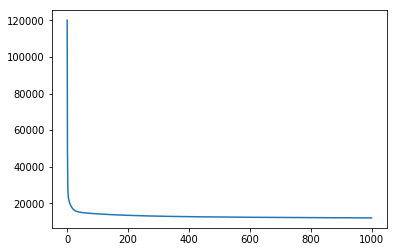

In [8]:
plt.plot(error1)
plt.show()

In [9]:
theta2,error2=BatchGD(X_train,Y_train)

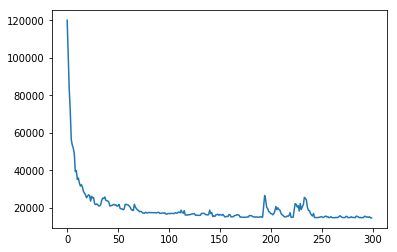

In [10]:
plt.plot(error2)
plt.show()

In [11]:
Y_predictedGD=np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    Y_predictedGD[i]=hypothesis(X_test[i,:],theta1)

In [12]:
Y_predictedMiniGD=np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    Y_predictedMiniGD[i]=hypothesis(X_test[i,:],theta2)
    

# Coefficient of determination

In [13]:
def cod(X,Y,theta):
    Y_pred=[]
    for i in range(X.shape[0]):
        Y_pred.append(hypothesis(X[i],theta))
    num=0
    deno=0
    mean1=Y.mean()
    for i in range(X.shape[0]):
        num+=(Y[i]-Y_pred[i])**2
        deno+=(Y[i]-mean1)**2
    return 1-(num/deno)

In [14]:
#For Gradient decent
r1=cod(X_test,Y_test,theta1)
print(r1)

0.4485358982011277


In [15]:
#For mini batch gradient decent
r2=cod(X_test,Y_test,theta2)
print(r2)

0.1954804667581761
